# Exploratory Data Analysis

## Objective :
- Understand our data as best as possible

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

import pickle

# Loading data

This dataset contains credit card offer acceptance information for customers of a bank.

Source of the data:  https://data.world/gautam2510/credit-card-dataset

# Description of the database "creditcardmarketing-bbm.csv"

### The independent variables recorded for these clients are as follows:

Customer Number: Unique identifier for each customer. (Integer)    

Reward: The type of reward offered with the credit card. (String)  

Mailer Type: The type of mailer used to send the offer. (String)  

Income Level: The customer’s income level. (String)  

#Bank Accounts Open: How many bank accounts does a customer have open? (Integer)  

Overdraft Protection: Whether or not a customer has overdraft protection on their account(s). (Boolean)  

Credit Rating: A rating based on how well a customer's payment record reflects their ability and willingness to repay debt under terms accepted by creditors. (String) 

#Credit Cards Held: How many credit cards does this user currently hold? (Integer)  

#Homes Owned: How many homes does this user own? (Integer)  

Household Size: Size of household that this person belongs is kept track of. (Integer)  

Own Your Home: Whether or not a particular user owns their home. (Boolean)  

Average Balance: Average balance across all accounts. (Float)  

Q1 Balance: The customers balance in each quarter throughout an entire year. (Float)  

Q2 Balance: The customers balance in each quarter throughout an entire year. (Float)  

Q3 Balance: The customers balance in each quarter throughout an entire year. (Float)  

Q4 Balance: The customers balance in each quarter throughout an entire year. (Float) 

### The target variable is: 

Offer Accepted: Whether or not the customer accepted the offer. (Boolean)

In [2]:
# pd.set_option('display.max_row', 20)          #Permet d'afficher toutes les colonnes(17) quand on fait le df.dtypes
# pd.set_option('display.max_column', 20)       #Permet d'afficher toutes les colonnes(17) quand on fait le df.head()

In [3]:
bankdata = pd.read_csv('Dataset/creditcardmarketing-bbm.csv')

In [4]:
bankdata.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
df = bankdata.copy()

In [6]:
# a. Shape of the data
print("Shape of the data:", df.shape)

# b. Data type of each attribute
print("\nData type of each attribute:")
df.info()

df.dtypes.value_counts()

Shape of the data: (18000, 17)

Data type of each attribute:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balanc

object     7
int64      5
float64    5
Name: count, dtype: int64

In [7]:
# c. Checking the presence of missing values
print("\nChecking the presence of missing values:")
print(df.isnull().sum())


Checking the presence of missing values:
Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64


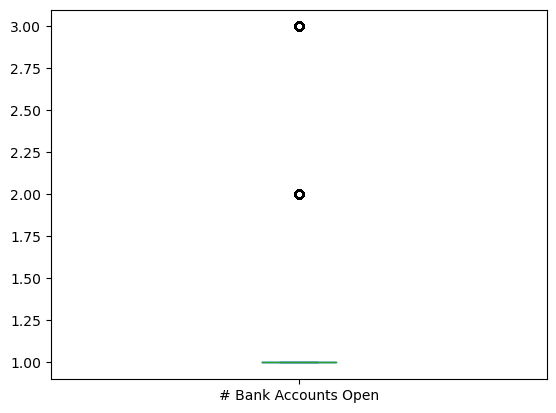

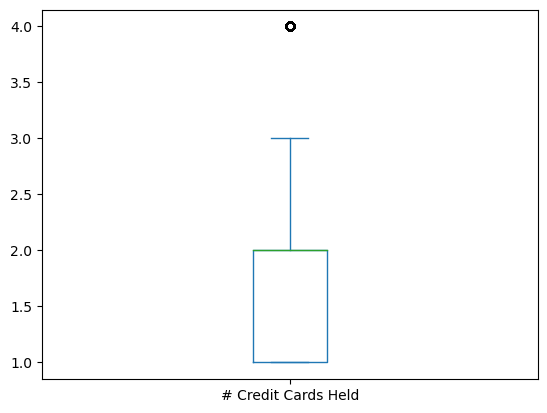

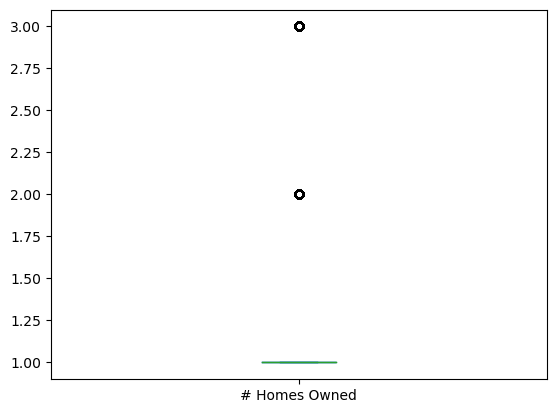

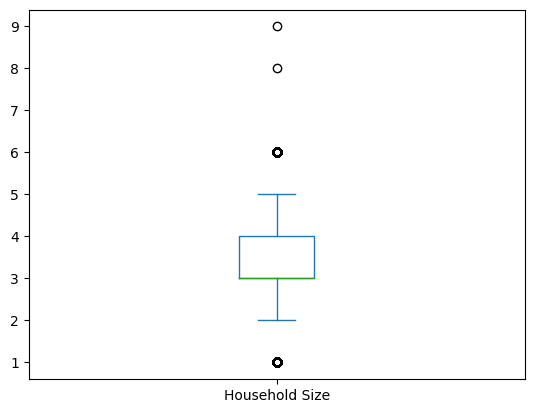

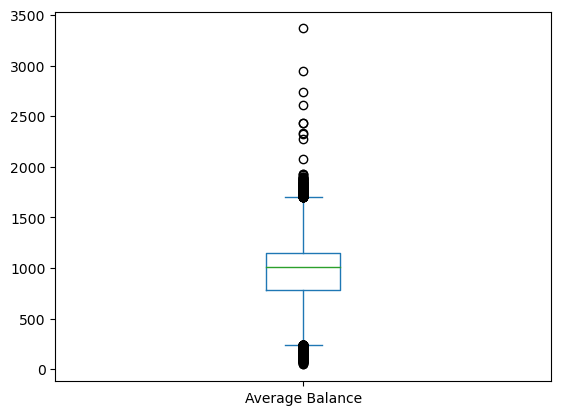

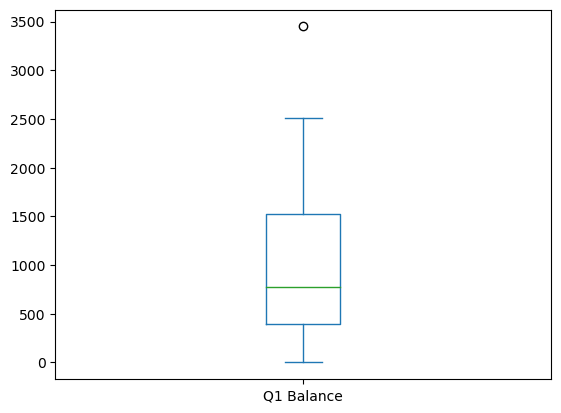

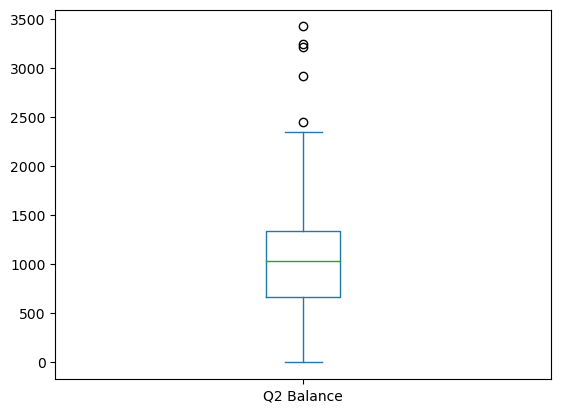

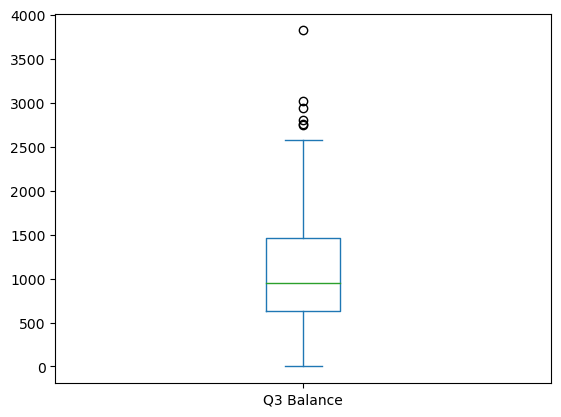

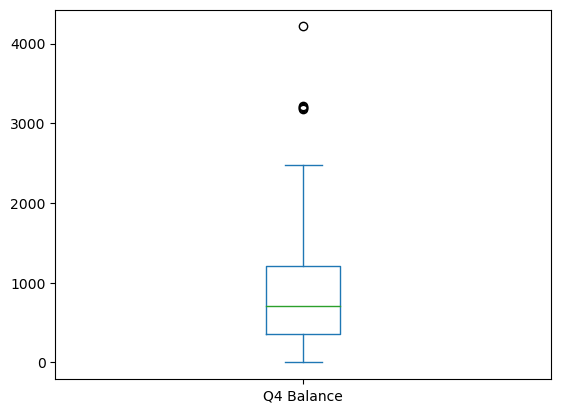

In [8]:
# e. Checking the presence of outliers
num_vars = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 'Household Size', 
            'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']

for var in num_vars:
    df[var].plot(kind='box')
    #plt.title(var)
    plt.show()

In [9]:
#5 point summary of numerical attributes
df.describe(include='all')

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,NaN,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,9000.500000,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [10]:
df['Offer Accepted'].value_counts()

Offer Accepted
No     16977
Yes     1023
Name: count, dtype: int64

# Univariate analysis

### Histograms of continuous variables

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\24

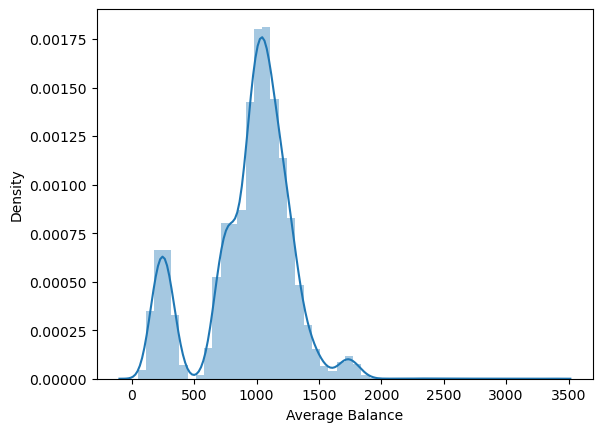

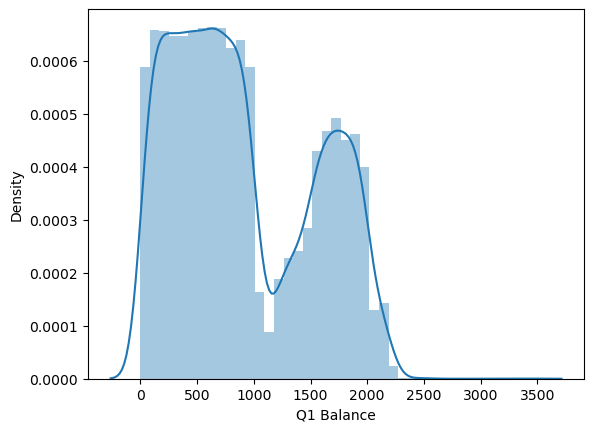

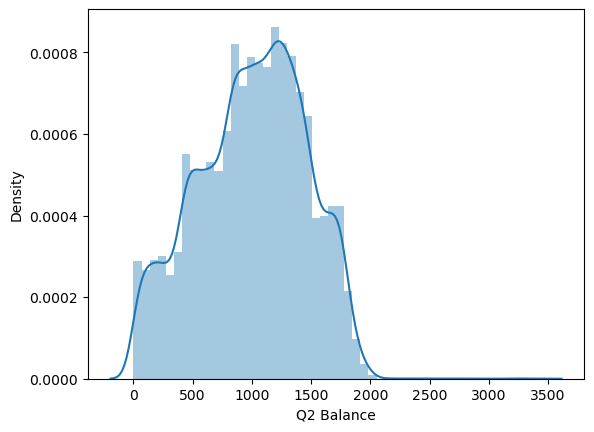

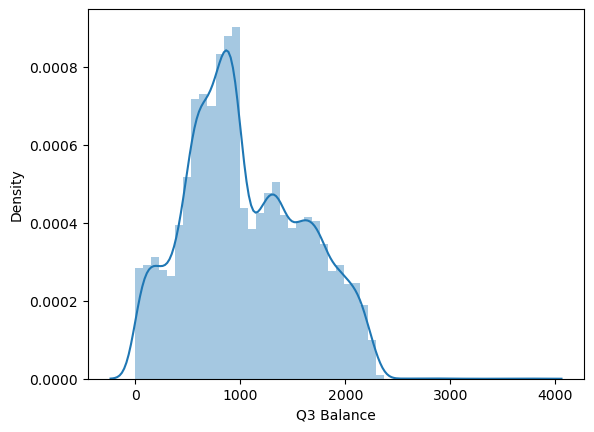

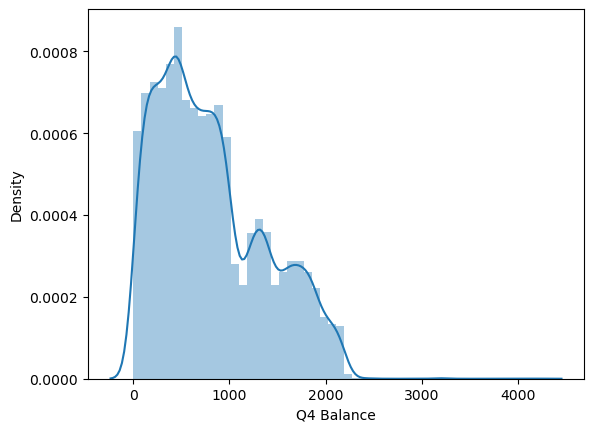

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Qualitative Variables

In [12]:
for col in df.select_dtypes('object'):
    print(f'{col.ljust(25, "-") } {df[col].unique()}')

Offer Accepted----------- ['No' 'Yes']
Reward------------------- ['Air Miles' 'Cash Back' 'Points']
Mailer Type-------------- ['Letter' 'Postcard']
Income Level------------- ['High' 'Medium' 'Low']
Overdraft Protection----- ['No' 'Yes']
Credit Rating------------ ['High' 'Medium' 'Low']
Own Your Home------------ ['No' 'Yes']


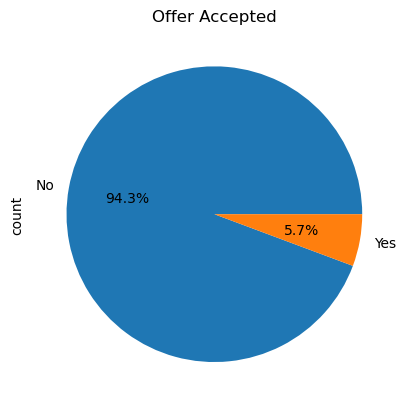

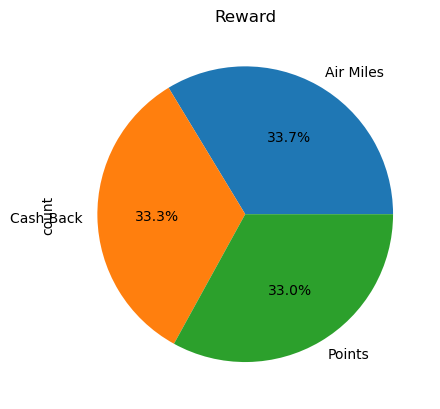

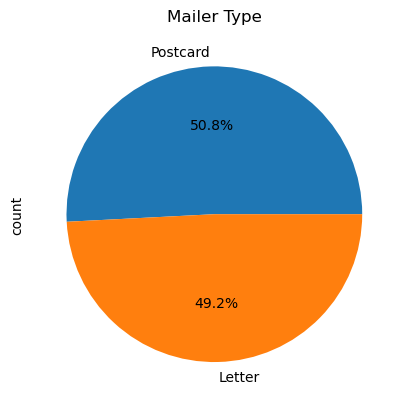

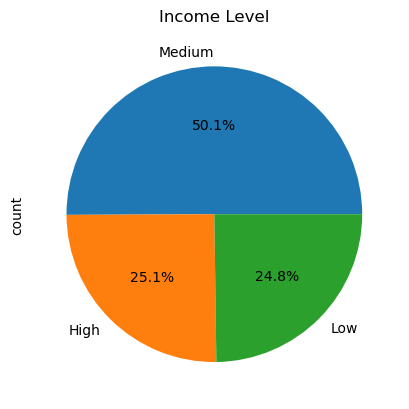

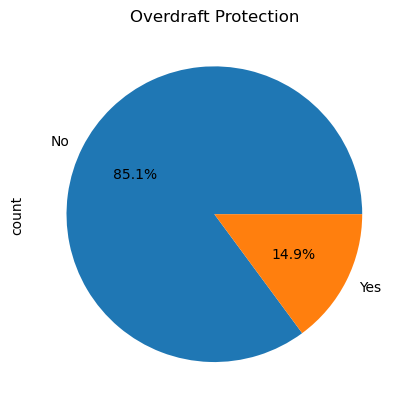

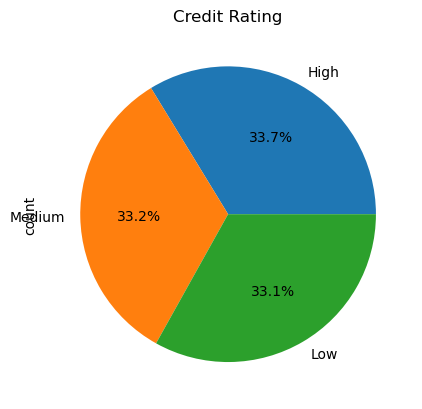

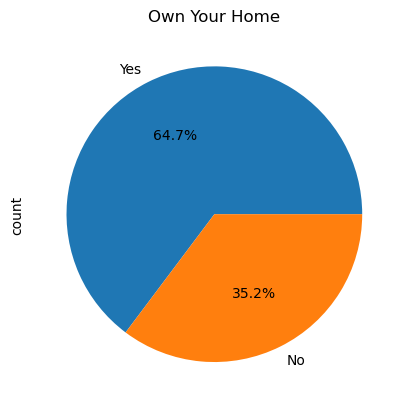

In [13]:
for col in df.select_dtypes('object'):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.show()

# Bivariate analysis: Target/Variables relationship

In [14]:
acceptation_df = df[df['Offer Accepted'] == 'Yes']

In [15]:
non_acceptation_df = df[df['Offer Accepted'] == 'No']

In [16]:
float_columns = []

for col in df.select_dtypes('float'):
    float_columns.append(col)

float_columns

['Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']

In [17]:
int_columns = []

for col in df.select_dtypes('int'):
    int_columns.append(col)
    
int_columns

['Customer Number',
 '# Bank Accounts Open',
 '# Credit Cards Held',
 '# Homes Owned',
 'Household Size']

In [18]:
cat_columns = []

for col in df.select_dtypes('object'):
    cat_columns.append(col)
    
cat_columns

['Offer Accepted',
 'Reward',
 'Mailer Type',
 'Income Level',
 'Overdraft Protection',
 'Credit Rating',
 'Own Your Home']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1059814763.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acceptation_df[col], label='Accept')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1059814763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_acceptation_df[col], label='R

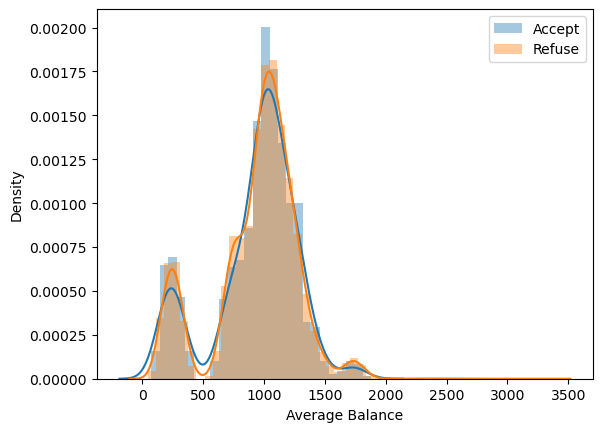

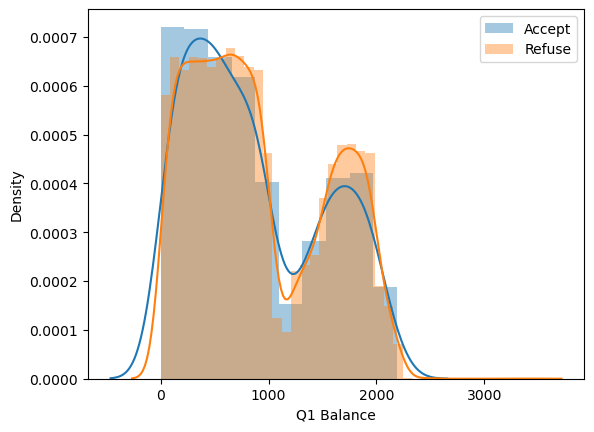

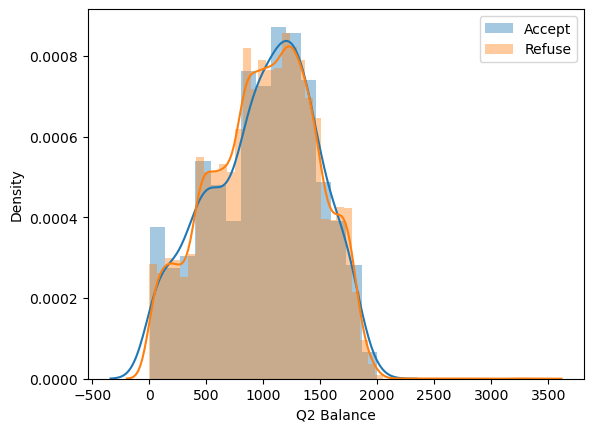

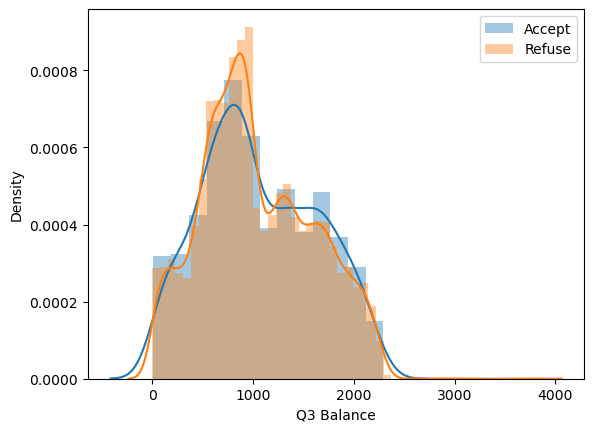

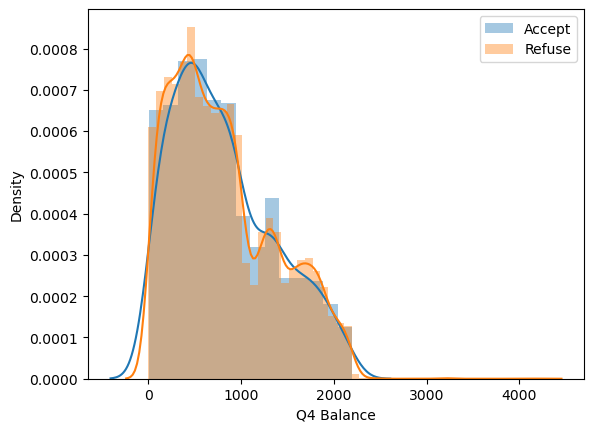

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(acceptation_df[col], label='Accept')
    sns.distplot(non_acceptation_df[col], label='Refuse')
    plt.legend()

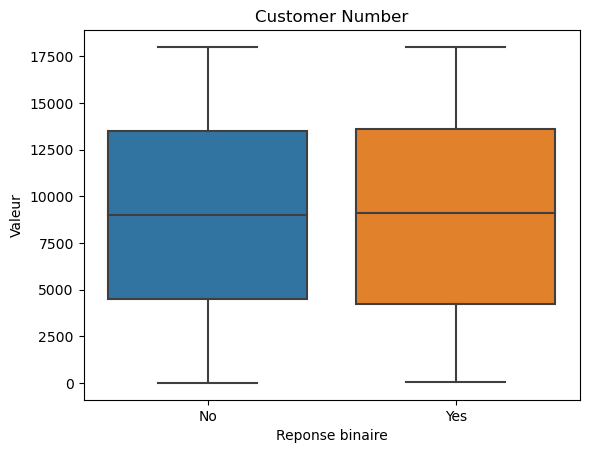

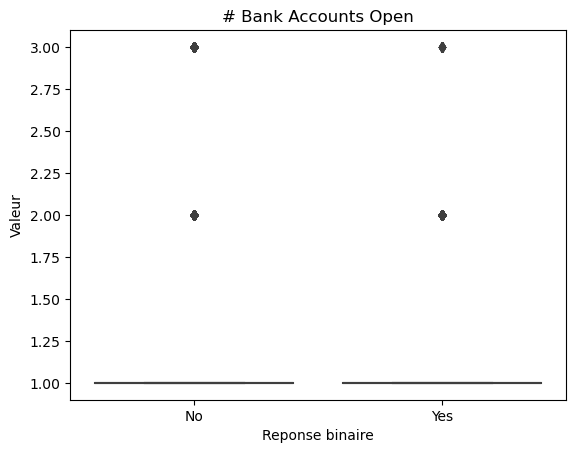

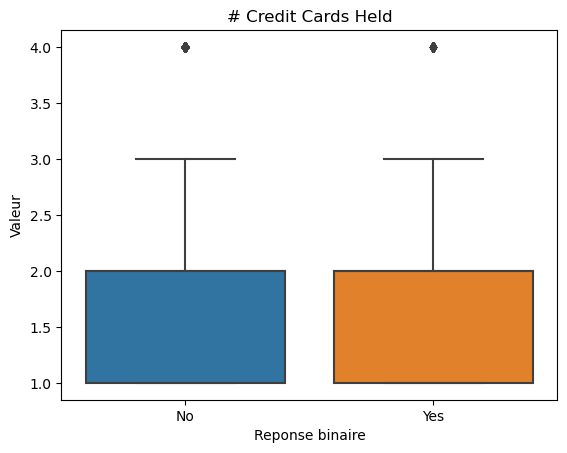

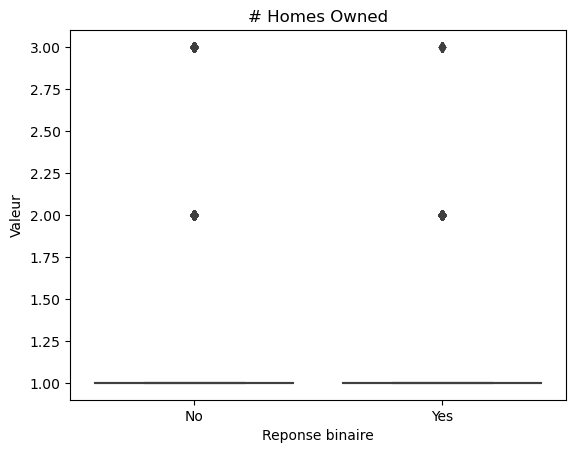

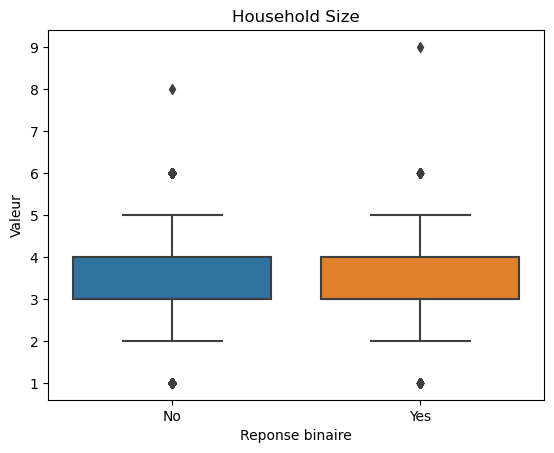

In [20]:
for var in int_columns:
    sns.boxplot(x="Offer Accepted", y=var, data=bankdata)
    plt.title(var)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

In [21]:
# for col in df.select_dtypes('object'):
#     plt.figure()
#     sns.heatmap(pd.crosstab(df['Offer Accepted'], df[col]), annot=True, fmt='d')

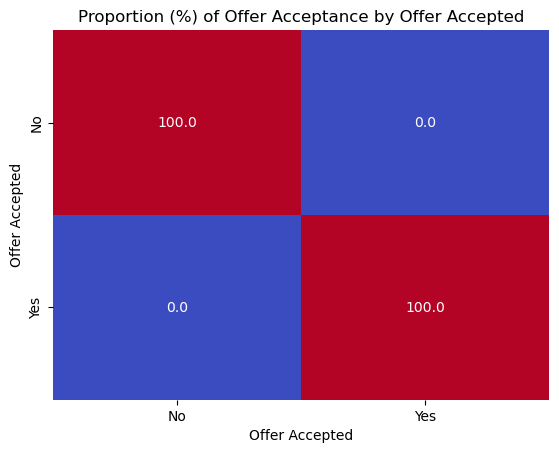

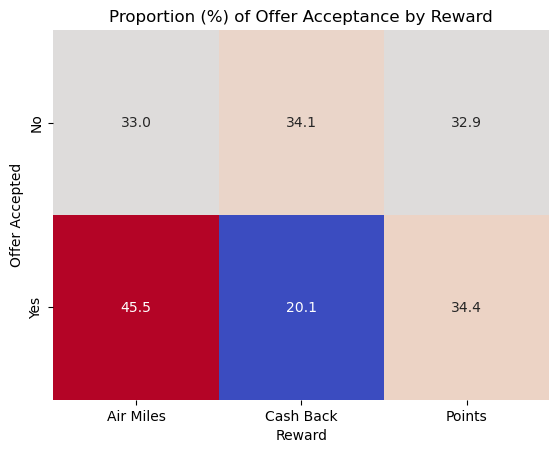

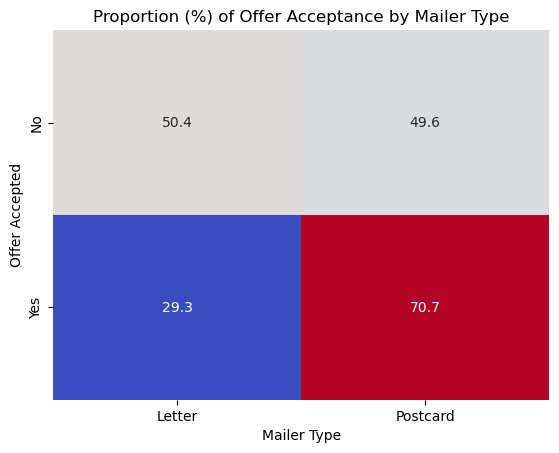

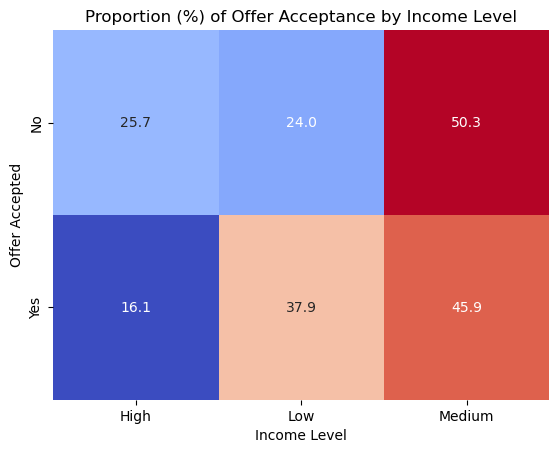

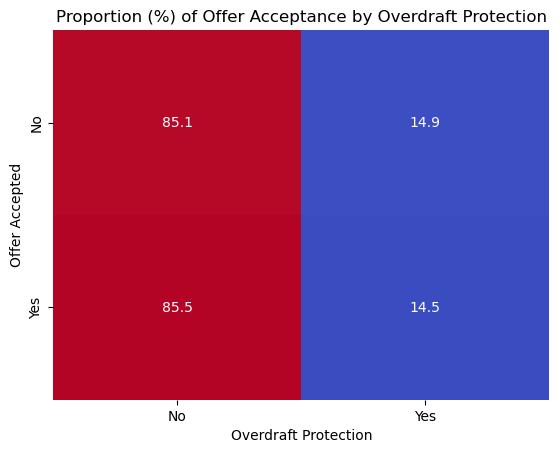

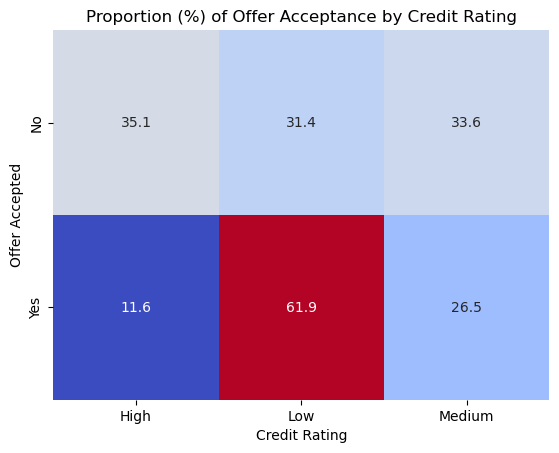

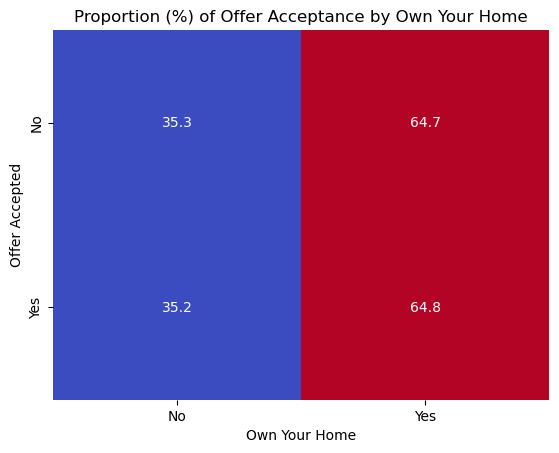

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    crosstab_table = pd.crosstab(df['Offer Accepted'], df[col], normalize='index') * 100
    sns.heatmap(crosstab_table, annot=True, fmt='.1f', cmap='coolwarm', cbar=False)
    plt.title(f'Proportion (%) of Offer Acceptance by {col}')
    plt.xlabel(col)
    plt.ylabel('Offer Accepted')
    plt.show()


interpretation: We can say that the type of reward, the mailer type and a low credit rating improve the acceptance of the credit card offer.

## Slightly more advanced analysis

### Relationship between continuous variables

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


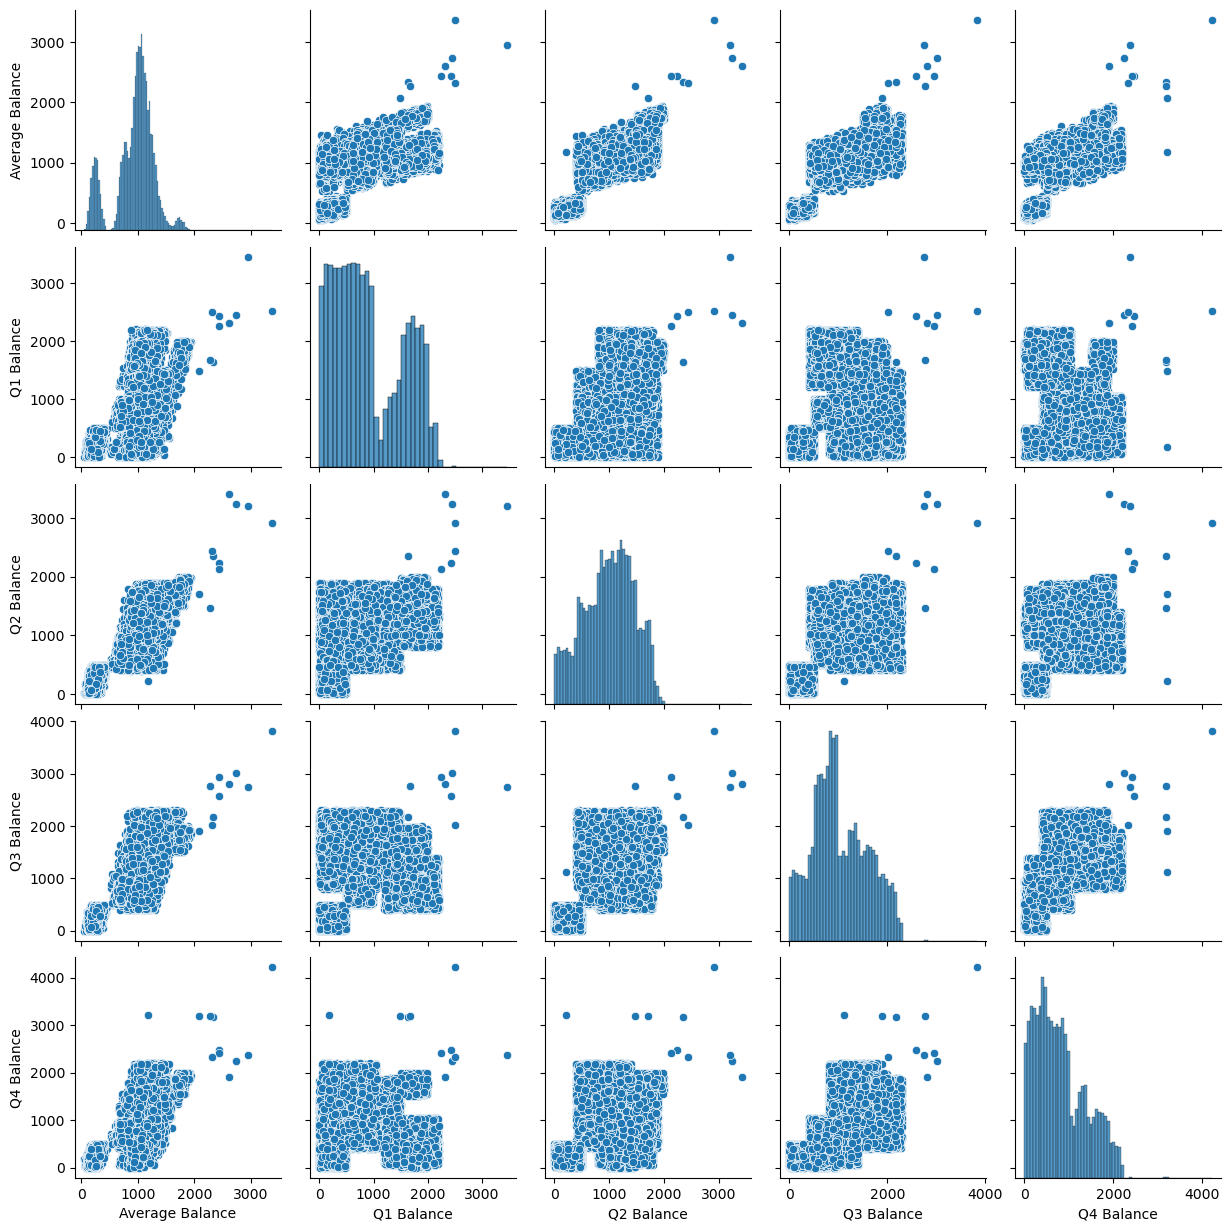

In [23]:
sns.pairplot(df[float_columns])

<Axes: >

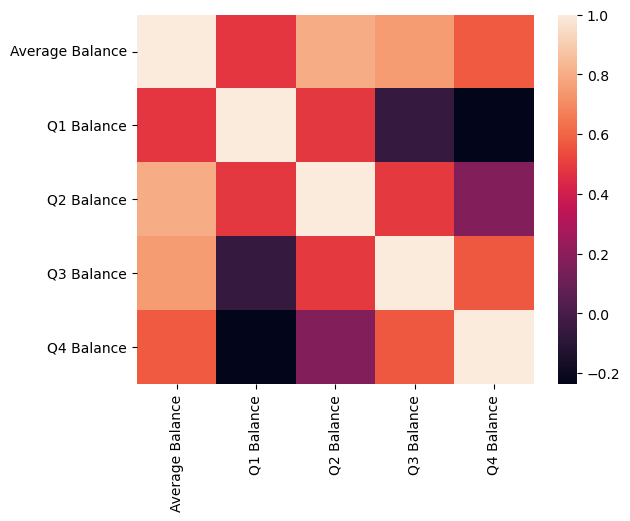

In [24]:
sns.heatmap(df[float_columns].corr())

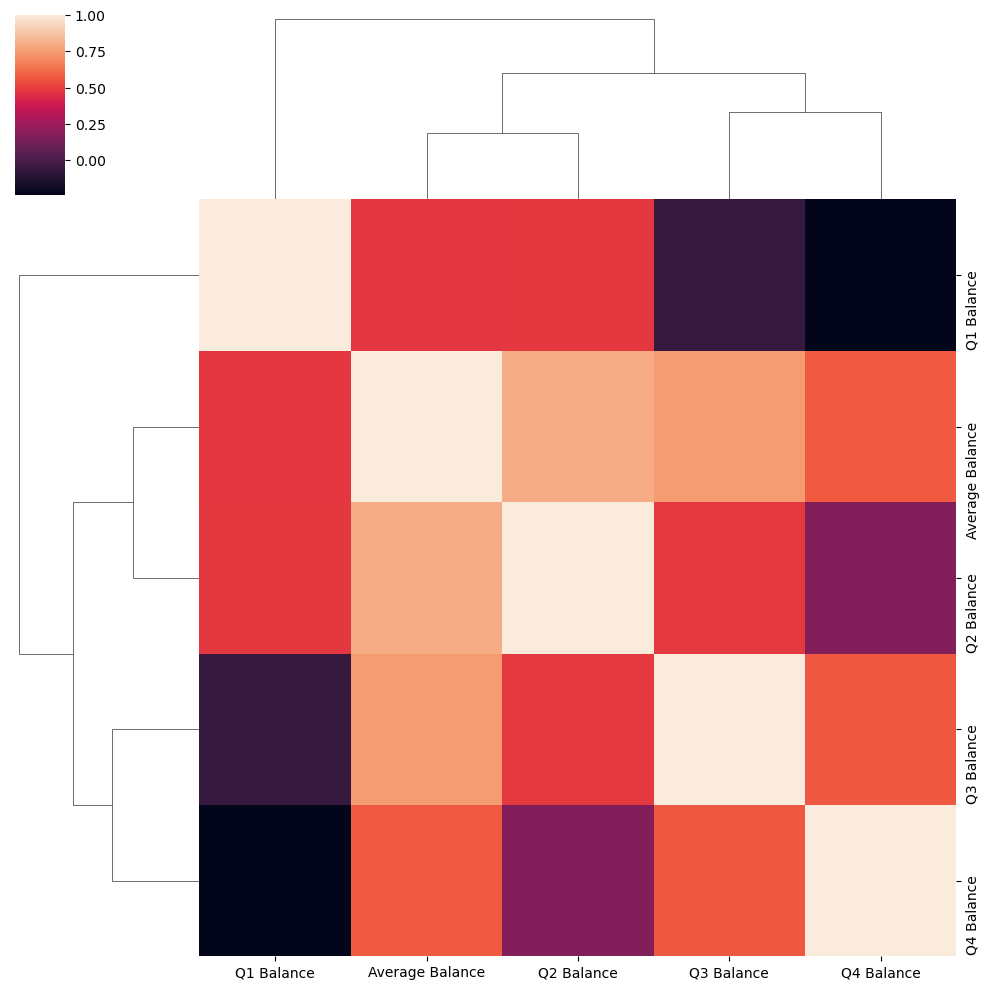

In [25]:
sns.clustermap(df[float_columns].corr())

In [26]:
for col in cat_columns:
    print(f"Contingency table for {col}:\n")
    print(pd.crosstab(df[col], df[col]))
    print("\n")

Contingency table for Offer Accepted:

Offer Accepted     No   Yes
Offer Accepted             
No              16977     0
Yes                 0  1023


Contingency table for Reward:

Reward     Air Miles  Cash Back  Points
Reward                                 
Air Miles       6061          0       0
Cash Back          0       5999       0
Points             0          0    5940


Contingency table for Mailer Type:

Mailer Type  Letter  Postcard
Mailer Type                  
Letter         8853         0
Postcard          0      9147


Contingency table for Income Level:

Income Level  High   Low  Medium
Income Level                    
High          4526     0       0
Low              0  4461       0
Medium           0     0    9013


Contingency table for Overdraft Protection:

Overdraft Protection     No   Yes
Overdraft Protection             
No                    15322     0
Yes                       0  2678


Contingency table for Credit Rating:

Credit Rating  High   Low  Medi

Interpretation: Here we check if there are people who are undecided, who have divided opinions, and we see that no, this means that the individuals are sure of the decision they are making.

In [27]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## Interpreting data mining results
#### Shape Analysis:
- **variable target**: Offer Accepted
- **rows and columns**: 18000, 17
- **types of variables**: qualitative: 7, quantitative: 10
- **Analysis of missing values**:
     - Very few missing values (less than 1%)

#### Background Analysis:
- **Visualization of the target**:
     - 6% Acceptance (1023 / 18000)
 
    
- **Meaning of variables**:
     - asymmetrical, non-standardized continuous variables
     - quantitative variables: larger households tend to accept the offer more (hypothesis to be verified)
     - qualitative variables: binary (0, 1) and ternary (0, 1, 2), many own a house, many do not have an overdraft, and many have an average salary.



- **Variables / Target relationship**:
     - target / continuous variables: there is no particular relationship between target variables and continuous variables
     - target/categorical variables: we can say that the type of reward (air mails, cash back), the mailer type (postcard) and a low credit rating improve the acceptance of the credit card offer. (Hypothesis a check)
     - target / discrete variables: those who have a lower bank balance tend to accept the offer (hypothesis to be verified)
    
    
    
### More detailed analysis

- **Relationship Variables / Variables**:
     - continuous variables / continuous variables: certain variables are moderately correlated: +0.5 (to be monitored later)
     - discrete variables / discrete variables: strongly correlated.
     - categorical variables / categorical variables: we observe that individuals are not divided, everyone is sure of the choice they make, and no one has to choose between one or more preferences, this could help us later to better classify individuals by categories.

- **NaN analysis**: there are 24 nan on the 18000 lines, and its 24 nan are on the last 24 lines of the float_columns variables

In [28]:
# Save the DataFrame
df.to_pickle('Exploration_data.pkl')